In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib as mpl
from numba import njit
mpl.rcParams['figure.dpi']= 100
from numba import vectorize

## DP functions

In [2]:
@vectorize(nopython=True)
def logic2(a,b,r1,p):
    if a == 1:
        if b == 1:
            # CASE A A
            if r1 < (1-(1-p)**2):  return 1
            else:                  return 0
        else:
            # CASE A I
            if r1 < p:             return 1
            else:                  return 0
    else:
        if b == 1:
            # CASE A I
            if r1 < p:             return 1
            else:                  return 0
        else:
            #CASE I I 
                                   return 0

@njit
def simula_DP(p,L0,T):
    L = np.copy(L0)
    N = len(L0)
    H = np.zeros((T+1,N))
    H[0] = np.copy(L)
    d = 1
    cont = 1
    for t in range(T):
        L2 = np.zeros(len(L))
        if d == 1:
            # MOVE TO THE RIGHT
            d = 2
            x = L[:-1]
            y = L[1:]
            r = np.random.random(len(x))
            L2[:-1] = logic2(x,y,r,p)
            if L[-1] == 1:
                if np.random.random() < p:
                    L2[-1] = 1
            else: L2[-1] = L[-1]
            L = np.copy(L2)
        else:
            # MOVE TO THE LEFT
            d = 1
            x = L[:-1]
            y = L[1:]
            r = np.random.random(len(x))
            L2[1:] = logic2(x,y,r,p)
            if L[1] == 1:
                if np.random.random() < p:
                    L2[1] = 1
            else: L2[1] = L[1]
            L = np.copy(L2)
        H[cont] = np.copy(L)
        cont += 1
    return H   

In [3]:
@njit
def corr(C):
    dim = C.shape
    out = np.zeros(dim[0])
    cont = np.zeros(dim[0])
    
    for i in range(dim[0]):
        for j in range(dim[1]):
            ind = np.abs(i-j)
            out[ind] += C[i,j]
            cont[ind] += 1
            
    return out/cont
_ = corr(np.ones((3,3)))

## DP2 functions

In [4]:
@vectorize(nopython=True)
def logic(a,b,r1,r2,p):
    if a == 0:
        if b == 0:
            # CASE A A
            if r1 < (1-(1-p)**2):  return 0
            elif r2 < 0.5:         return 1
            else:                  return 2
        elif b==1:
            # CASE A I1
            if r1 < p:             return 0
            else:                  return 1
        else:
            # CASE A I2
            if r1 < p:             return 0
            else:                  return 2
    elif a == 1:
        if b == 0:
            # CASE A I1
            if r1 < p:             return 0
            else:                  return 1
        elif b == 1:
            #CASE I1 I1 
                                   return 1
        else:
            #CASE I1 I2 
                                   return 0
    else:
        if b == 0:
            # CASE A I2
            if r1 < p:             return 0
            else:                  return 2
        elif b == 1:
            #CASE I2 I1 
                                   return 0
        else:
            #CASE I2 I2 
                                   return 2

@njit
def simula_DP2(p,L0,T):
    L = np.copy(L0)
    N = len(L0)
    H = np.zeros((T+1,N))
    H[0] = np.copy(L)
    d = 1
    cont = 1
    for t in range(T):
        L2 = np.zeros(len(L))
        if d == 1:
            # MOVE TO THE RIGHT
            d = 2
            x = L[:-1]
            y = L[1:]
            r = np.random.random((2, len(x)))
            L2[:-1] = logic(x,y,r[0],r[1],p)
            if L[-1] == 0:
                if np.random.random() > p:
                    if np.random.random() < 0.5: L2[-1] = 1
                    else                       : L2[-1] = 2
            else: L2[-1] = L[-1]
            L = np.copy(L2)
        else:
            # MOVE TO THE LEFT
            d = 1
            x = L[:-1]
            y = L[1:]
            r = np.random.random((2, len(x)))
            L2[1:] = logic(x,y,r[0],r[1],p)
            if L[1] == 0:
                if np.random.random() > p:
                    if np.random.random() < 0.5: L2[1] = 1
                    else                       : L2[1] = 2
            else: L2[1] = L[1]
            L = np.copy(L2)
        H[cont] = np.copy(L)
        cont += 1
    return H

def simula2(p,L0,T):
    H = simula_DP2(p,L0,T)
    H[H == 0] = -1 
    H [H>0] = 0
    K = np.abs(H)
    return K

## PLOTS

In [5]:
from PIL import Image, ImageDraw

In [6]:
def disegna(a,stampa = False):
    bg = (255,255,255)
    blue = (0,0,255)
    dim = a.shape
    img = Image.new('RGB', (dx*dim[1]*2+dx, dx*dim[0]+dx), bg)
    draw = ImageDraw.Draw(img)
    
    
    
    for j in range(dim[0]):
        y = dx*j
        for i in range(dim[1]):
            if j % 2 == 0:
                x = 2*i*dx
            else : x = dx + 2*i*dx
            if a[j,i]: 
                color = blue
                draw.polygon(
                    ((x+dx, y),(x+2*dx, y+dx),(x+dx,y+2*dx),(x, y+dx)),
                    fill=color,
                    outline=blue)


    if stampa: display(img)
    return img

In [11]:
def disegna2(a,stampa = False):
    bg = (255,255,255)
    blue = (0,0,255)
    brown = (135,76,0)
    gray = (100,100,100)
    
    dim = a.shape
    img = Image.new('RGB', (dx*dim[1]*2+dx, dx*dim[0]+dx), bg)
    draw = ImageDraw.Draw(img)
    
    
    
    for j in range(dim[0]):
        y = dx*j
        for i in range(dim[1]):
            if j % 2 == 0:
                x = 2*i*dx
            else : x = dx + 2*i*dx
            if a[j,i] == 0: 
                color = blue
            elif a[j,i] == 1:
                color = gray
            elif a[j,i] == 2: 
                color = brown
            else :color = bg
            draw.polygon(
                    ((x+dx, y),(x+2*dx, y+dx),(x+dx,y+2*dx),(x, y+dx)),
                    fill=color,
                    outline=color)


    if stampa: display(img)
    return img

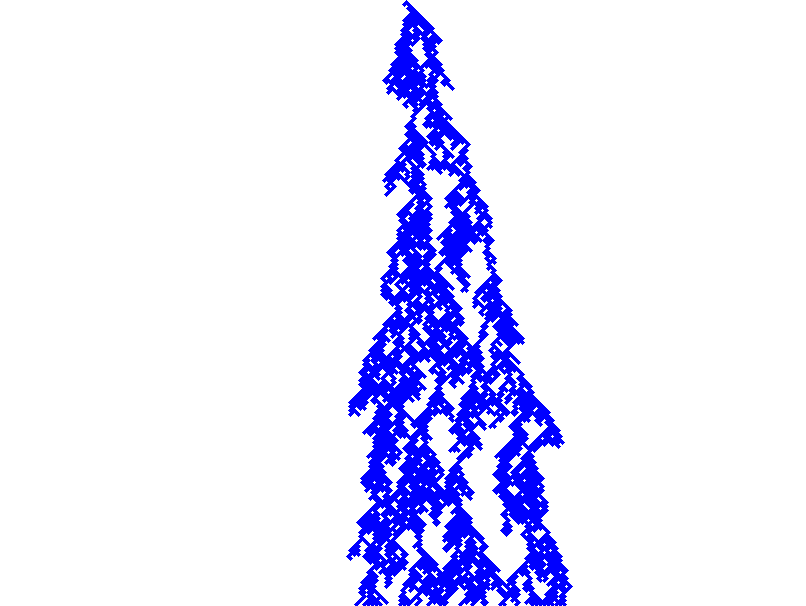

In [10]:
dx =2

N =201
p = 0.645
L0 = np.zeros(N)
L0[int(1+N/2)]=1
a = simula_DP(p,L0,T=int(N*1.5))
disegna(a)
#img.save(path+"gif1-"+str(cont)+'.png')

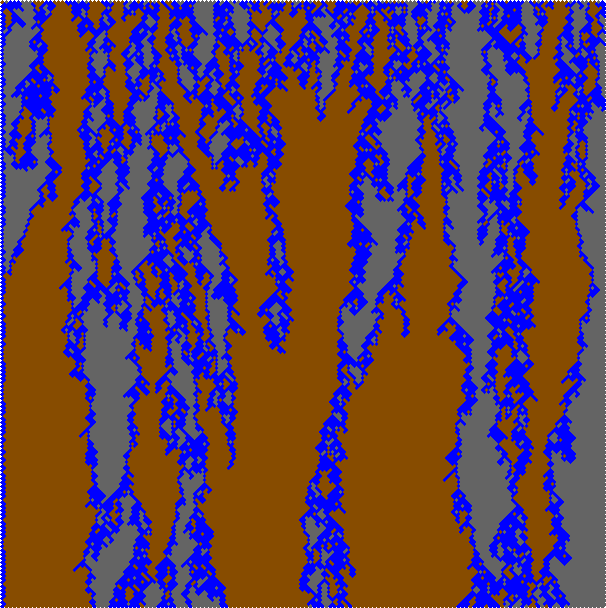

In [15]:
dx =2

np.random.seed(1234)

N =151
p = 0.55
L0 = np.random.randint(0,3,N)+0.

a = simula_DP2(p,L0,T=int(N*2))
img = disegna2(a,True)
#img.save('img/inactive_DP2.png')

In [12]:
path = 'gif1/'
b = np.zeros(a.shape)

dim = a.shape
IMG = Image.new('RGB', (dx*dim[1]*2+dx, dx*dim[0]+dx), (0, 0, 0))

L_img = []

cont = 0
skip = int(1+len(a)/80)
for i in tqdm(range(len(a))):
    if i%skip == 0:
        b[:(i+1)] = a[:(i+1)]
        img = disegna(b)
        img.save(path+"gif1-"+str(cont)+'.png')
        cont+=1
    
#IMG.save('out.gif', save_all=True, append_images=L_img, duration=100, loop=0)

100%|██████████████████████████████████████████████████████████████| 302/302 [00:03<00:00, 98.38it/s]


In [289]:
path = 'gif2/'
b = -np.ones(a.shape)

dim = a.shape
IMG = Image.new('RGB', (dx*dim[1]*2+dx, dx*dim[0]+dx), (0, 0, 0))

L_img = []

cont = 0
skip = int(1+len(a)/80)
for i in tqdm(range(len(a))):
    if i%skip == 0:
        b[:(i+1)] = a[:(i+1)]
        img = disegna2(b)
        img.save(path+"gif2-"+str(cont)+'.png')
        cont+=1
    
#IMG.save('out.gif', save_all=True, append_images=L_img, duration=100, loop=0)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 262/262 [00:14<00:00, 18.65it/s]
